<a href="https://colab.research.google.com/github/abacon118/Random/blob/main/ECGR4105_S25_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrew Bowman
abowma29@charlotte.edu
801166409

Problem 1

Linear model for X1: Y = 5.29 + -1.79 * X1
Linear model for X2: Y = 0.69 + 0.58 * X2
Linear model for X3: Y = 2.59 + -0.41 * X3
Cost for X1: 1.04
Cost for X2: 3.60
Cost for X3: 3.64


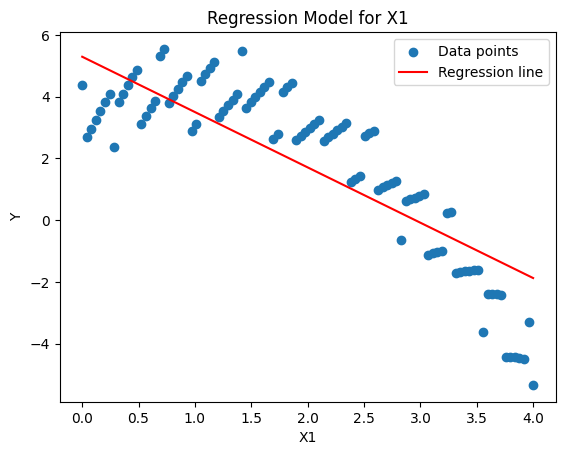

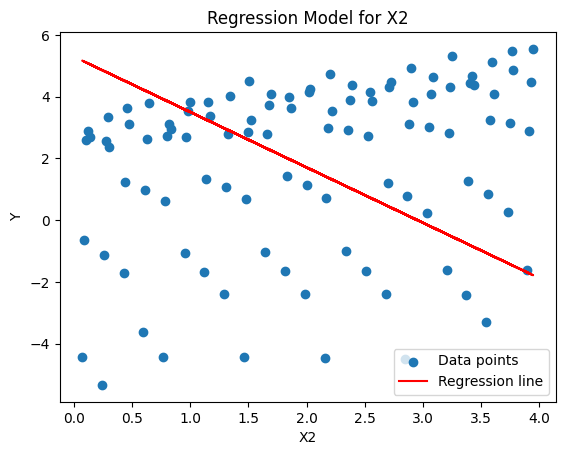

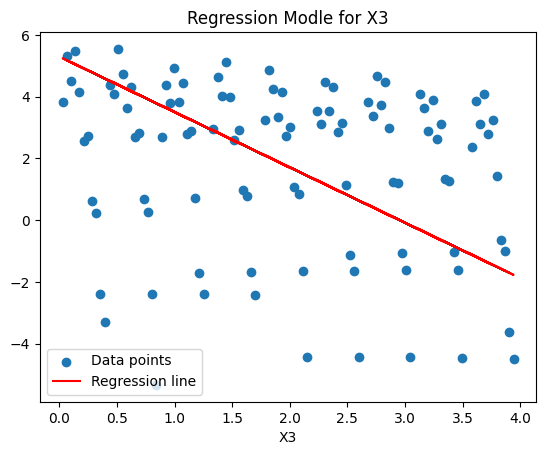

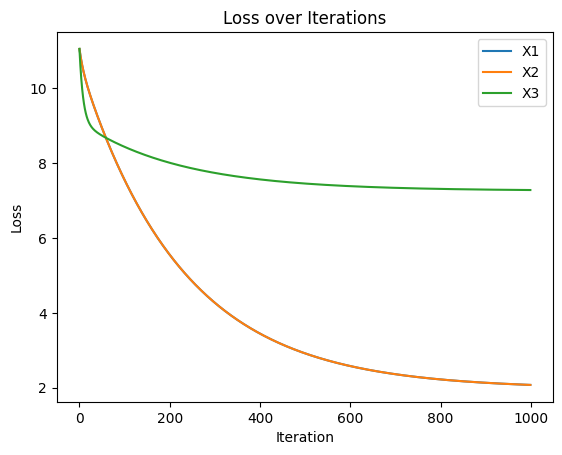

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
D3 = pd.read_csv("/content/D3.csv")

X1 = D3['X1'].values
X2 = D3['X2'].values
X3 = D3['X3'].values
Y = D3['Y'].values

t1 = np.zeros(2)
t2 = np.zeros(2)
t3 = np.zeros(2)

learnrate = 0.01
iterations = 1000


def compute_cost(X,Y,theta):
  m = len(X)
  predictions = X.dot(theta)
  cost = (1/(2*m)) * np.sum(np.square(predictions-Y))
  return cost

def graddes(X, Y, theta):
  m = len(Y)
  losshist = []
  cost_history = []
  for _ in range(iterations):
    h = np.dot(X, theta)
    grad = np.dot(X.T, (h-Y)) / m
    theta -= learnrate * grad
    loss = np.mean((h - Y) ** 2)
    losshist.append(loss)
    cost = compute_cost(X,Y,theta)
    cost_history.append(cost)
  return theta, losshist, cost_history



x1bias = np.column_stack((np.ones(len(X1)),X1))
x2bias = np.column_stack((np.ones(len(X1)),X2))
x3bias = np.column_stack((np.ones(len(X1)),X3))

t1,losshist1,costhist1 = graddes(x1bias, Y, t1)
t2,losshist2,costhist2 = graddes(x2bias, Y, t2)
t3,losshist3,costhist3 = graddes(x3bias, Y, t3)

print(f"Linear model for X1: Y = {t1[0]:.2f} + {t1[1]:.2f} * X1")
print(f"Linear model for X2: Y = {t2[0]:.2f} + {t2[1]:.2f} * X2")
print(f"Linear model for X3: Y = {t3[0]:.2f} + {t3[1]:.2f} * X3")

cost1 = compute_cost(x1bias, Y, t1)
cost2 = compute_cost(x2bias, Y, t2)
cost3 = compute_cost(x3bias, Y, t3)

print(f"Cost for X1: {cost1:.2f}")
print(f"Cost for X2: {cost2:.2f}")
print(f"Cost for X3: {cost3:.2f}")

predicted_y_x1 = t1[0] + t1[1] * X1
plt.scatter(X1, Y, label='Data points')
plt.plot(X1, predicted_y_x1, color='red', label='Regression line')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Regression Model for X1')
plt.legend()
plt.show()


predicted_y_x2 = t1[0] + t1[1] * X2
plt.scatter(X2, Y, label='Data points')
plt.plot(X2, predicted_y_x2, color='red', label='Regression line')
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Regression Model for X2')
plt.legend()
plt.show()

predicted_y_x3 = t1[0] + t1[1] * X3
plt.scatter(X3, Y, label='Data points')
plt.plot(X3, predicted_y_x3, color='red', label='Regression line')
plt.xlabel('X3')
plt.title('Regression Modle for X3')
plt.legend()
plt.show()


plt.plot(range(iterations), losshist1, label=f"X1")
plt.plot(range(iterations), losshist1, label=f"X2")
plt.plot(range(iterations), losshist3, label=f"X3")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()


Problem 2

Linear model for X1, X2, and X3: Y = 3.40 + -1.73 * X1 + 0.85 * X2 + 0.02 * X3


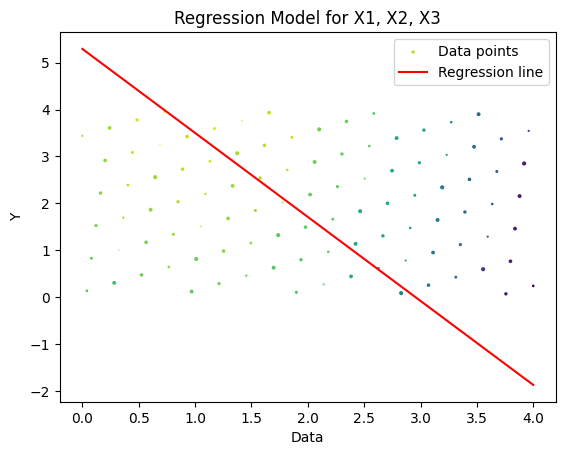

Final cost for learning rate 0.1: 0.74
Final cost for learning rate 0.05: 0.74


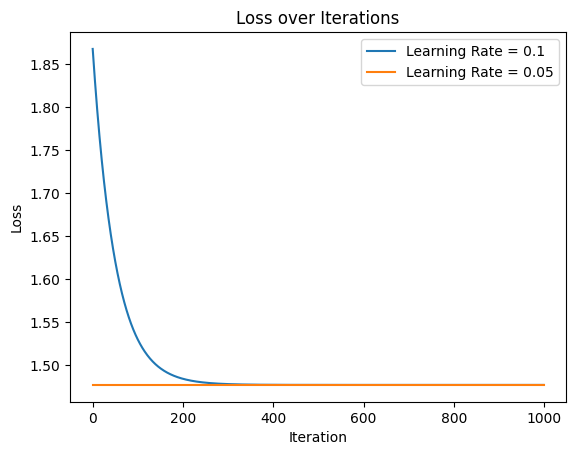

Predicted value of Y for (X1, X2, X3) = (1, 1, 1): 3.58
Predicted value of Y for (X1, X2, X3) = (2, 0, 4): 0.24
Predicted value of Y for (X1, X2, X3) = (3, 2, 1): 0.10


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
D3 = pd.read_csv("/content/D3.csv")

X1 = D3['X1'].values
X2 = D3['X2'].values
X3 = D3['X3'].values
Y = D3['Y'].values
X = np.column_stack((X1, X2, X3))
theta = np.zeros(4)

learnrate = 0.01
iterations = 1000

def compute_cost(X,Y,theta):
  m = len(X)
  predictions = X.dot(theta)
  cost = (1/(2*m)) * np.sum(np.square(predictions-Y))
  return cost

def graddes(X, Y, theta, lr):
  m = len(Y)
  losshist = []
  cost_history = []
  for _ in range(iterations):
    h = np.dot(X, theta)
    grad = np.dot(X.T, (h-Y)) / m
    theta -= lr * grad
    loss = np.mean((h - Y) ** 2)
    losshist.append(loss)
    cost = compute_cost(X,Y,theta)
    cost_history.append(cost)
  return theta, losshist, cost_history

xbias = np.column_stack((np.ones(len(X1)), X1, X2, X3))
theta, losshist, costhist = graddes(xbias, Y, theta, learnrate)

print(f"Linear model for X1, X2, and X3: Y = {theta[0]:.2f} + {theta[1]:.2f} * X1 + {theta[2]:.2f} * X2 + {theta[3]:.2f} * X3")


predicted_y_x1 = t1[0] + t1[1] * X1
plt.scatter(X1,X2,X3, Y, label='Data points')
plt.plot(X1, predicted_y_x1, color='red', label='Regression line')
plt.xlabel('Data')
plt.ylabel('Y')
plt.title('Regression Model for X1, X2, X3')
plt.legend()
plt.show()



xbias = np.column_stack((np.ones(len(X1)), X1, X2, X3))

lrvals = [0.1,0.05,0.01]
besttheta = 0
bestcost = 999999999999
best_learnrate = 0
for lr in lrvals:
    theta, losshist, costhist = graddes(xbias, Y, theta, lr)
    final_cost=compute_cost(xbias, Y, theta)
    print(f"Final cost for learning rate {lr}: {final_cost:.2f}")

    if final_cost<bestcost:
      bestcost = final_cost
      besttheta = theta
      best_learnrate = lr

    plt.plot(range(iterations), losshist, label=f"Learning Rate = {lr}")



plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()


new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values_bias = np.column_stack((np.ones(new_values.shape[0]), new_values))
predictions = new_values_bias.dot(besttheta)

for i, (x1, x2, x3) in enumerate(new_values):
    print(f"Predicted value of Y for (X1, X2, X3) = ({x1}, {x2}, {x3}): {predictions[i]:.2f}")

